# Milestone 2: Prediciton of Milk Quality 

by: Naomi Amelia

# Objective

 This project is aimed to gain prediction of milk quality by using machine learning 

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.metrics import classification_report, plot_precision_recall_curve, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import pickle

import warnings; warnings.filterwarnings("ignore"); warnings.simplefilter('ignore')

# Data Loading

In [2]:
df = pd.read_csv('milknew.csv')
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [3]:
df.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


We can see that there are no normal missing values and that the number of columns are 16 which includes 15 feature columns and 1 target column (Status)

In [5]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [6]:
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

# EXPLORATORY DATA ANALYSIS 

In [7]:
df.head(3)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low


From this we can see that the features are divided into two types which are categorical and numerical. Let us see the contains of each of the categorical features and then visualisizing them.

## Categorical Features

0 depicts when the milk has the categorical of "Bad" and 1 of "Good"

<AxesSubplot:xlabel='Taste', ylabel='count'>

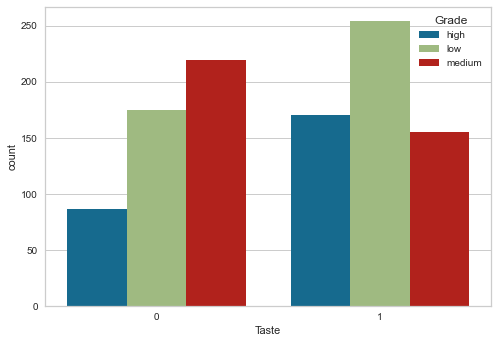

In [8]:
sns.countplot(data=df, x='Taste', hue='Grade')


In [9]:
df["Taste"].value_counts()

1    579
0    480
Name: Taste, dtype: int64

We can see that from our dataset that the milk products are almost evenly distributed between the bad and good taste. 

<AxesSubplot:xlabel='Odor', ylabel='count'>

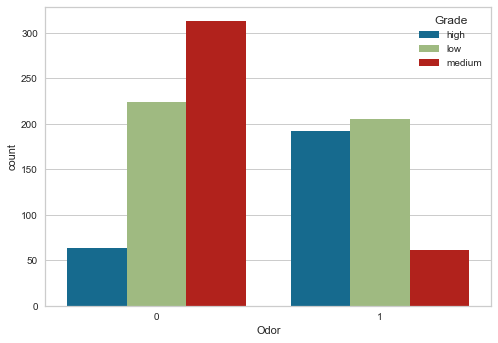

In [10]:
sns.countplot(data=df, x='Odor', hue='Grade')

In [11]:
df["Odor"].value_counts()

0    601
1    458
Name: Odor, dtype: int64

From this output we can see that the odor category is mostly in bad condition. 

<AxesSubplot:xlabel='Fat ', ylabel='count'>

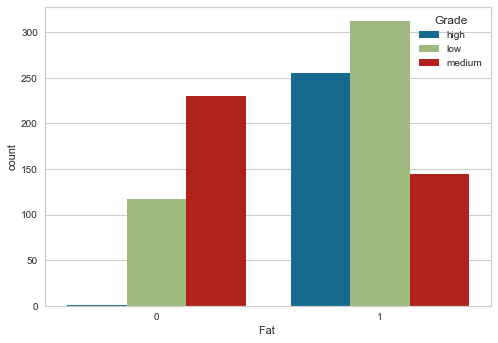

In [12]:
sns.countplot(data=df, x='Fat ', hue='Grade')

In [13]:
df["Fat "].value_counts()

1    711
0    348
Name: Fat , dtype: int64

The products seem to mainly have good fat in their contents.

<AxesSubplot:xlabel='Turbidity', ylabel='count'>

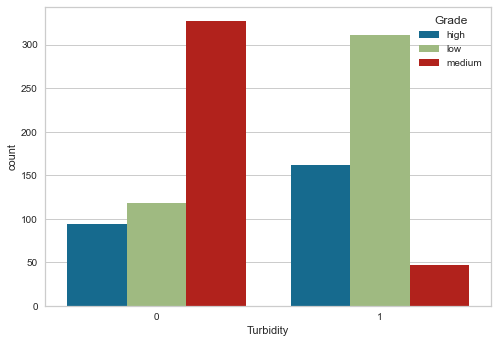

In [14]:
sns.countplot(data=df, x='Turbidity', hue='Grade')

In [15]:
df["Turbidity"].value_counts()

0    539
1    520
Name: Turbidity, dtype: int64

Here, we can see how the turbidity of the products are evenly distributed with the bad turbidity is mostly concentrated in the medium grade and the good turbidity is mostly concentrated in the low grade products.

## Numerical Features 

<AxesSubplot:xlabel='Colour'>

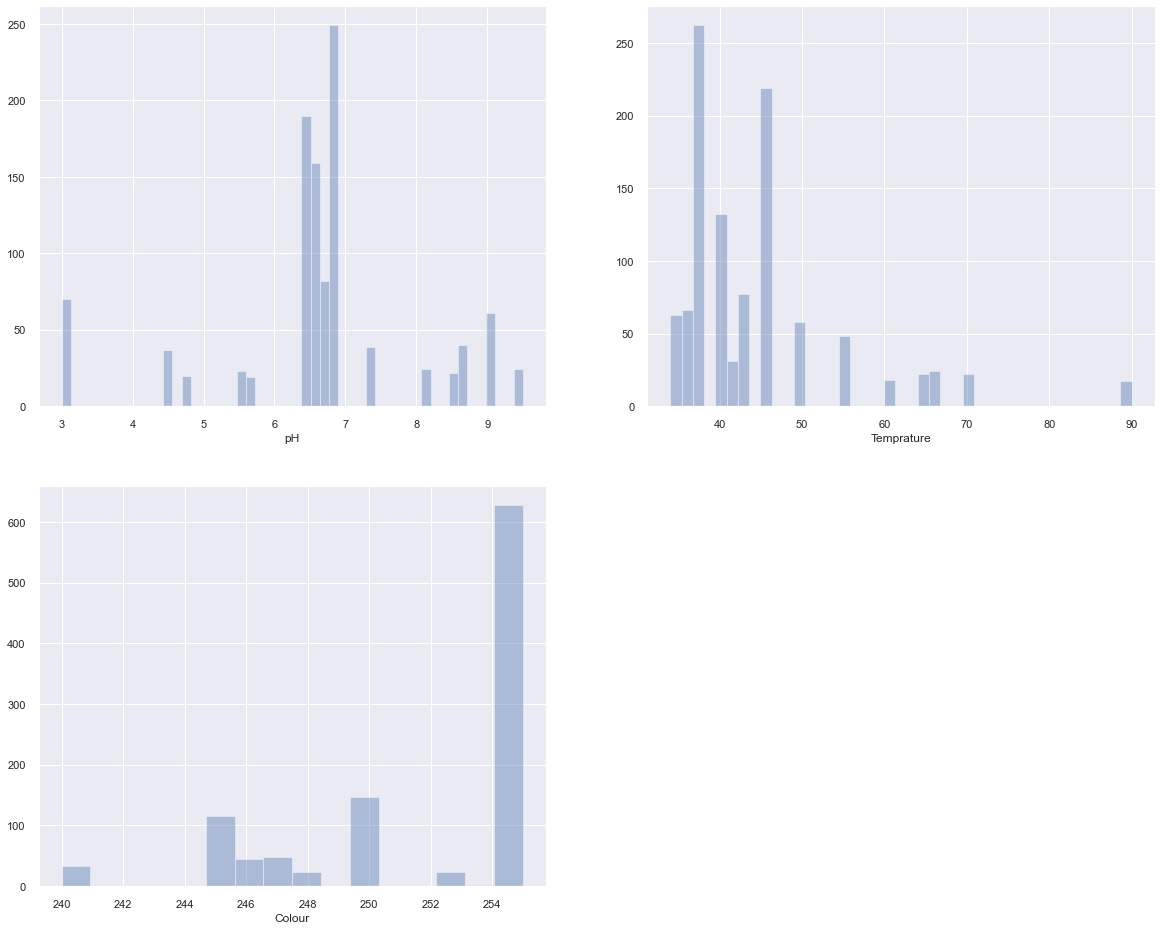

In [16]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.distplot(df.pH, kde = False)

plt.subplot(3,2,2)
sns.distplot(df['Temprature'], kde = False)

plt.subplot(3,2,3)
sns.distplot(df['Colour'], kde = False)

From these bar plots the insights we can draw are:

1. The pH of the milk products are mainly distributed in 6.5 and below the pH level of 7 which is the normal pH of milk since it contains lactic acid (making the pH slightly below the neutral level of 7)

2. Yet, we can see how the pH levels of some products are in the abnormal areas (below 6 which is highly acidic and above 7 which is basic/alkaline).

3. As for the temperature we can see that it is mainly distributed in the 35-45 degree celcius which is the best temperature for inoculation of starter in milk is 35 to 40 degree Celsius.

4. As for the color, we can see that the milk products in the dataset is mainly distributed in the 255, which is pure white.

# Data Preprocessing

## Splitting the Dataframe

### Inference

In this section, I will split the dataframe to an inference dataset that will be used later in the model inference. 

In [17]:
df_inf = df.sample(15, random_state=19)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,8.1,66,1,0,1,1,255,low
1,6.6,43,1,0,1,1,250,high
2,7.4,65,0,0,0,0,255,low
3,4.5,60,0,1,1,1,250,low
4,6.6,38,1,0,1,0,255,high
5,6.5,38,1,0,1,0,255,medium
6,4.7,38,1,0,1,0,255,low
7,5.5,45,1,0,1,1,250,low
8,6.6,45,0,1,1,1,250,high
9,4.7,38,1,0,1,0,255,low


In [18]:
df1 = df.drop(df_inf.index)
df1.reset_index(drop=True, inplace=True)
df1

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.5,38,1,0,0,0,255,medium
1,4.7,38,1,0,1,0,255,low
2,3.0,40,1,1,1,1,255,low
3,9.0,43,1,0,1,1,250,low
4,6.8,40,1,0,1,0,245,medium
...,...,...,...,...,...,...,...,...
1039,6.7,45,1,1,0,0,247,medium
1040,6.7,38,1,0,1,0,255,high
1041,3.0,40,1,1,1,1,255,low
1042,6.8,43,1,0,1,0,250,high


In [19]:
X = df1.drop(columns='Grade')
y = df1['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_train_num = X_train[["pH", "Temprature", "Colour"]]
X_test_num = X_test[["pH", "Temprature", "Colour"]]

X_train_cat = X_train[['Taste','Odor','Fat ','Turbidity']]
X_test_cat = X_test[['Taste','Odor','Fat ','Turbidity']]

In [21]:
df_num = df1[["pH", "Temprature", "Colour"]]

In [22]:
def plot_dist(df_num, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df_num[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df_num[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df_num[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df_num[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df_num[col].name + ' Kurtosis: ' + str(df_num[col].kurt()))
    print(df_num[col].name + ' Skewness: ' + str(df_num[col].skew()))
    if -0.5 <= df_num[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df_num[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df_num[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

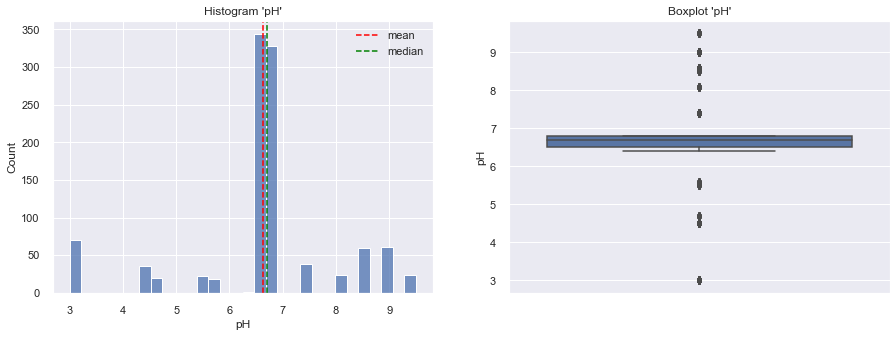

pH Kurtosis: 1.4064253234318045
pH Skewness: -0.6919412854380913
Columns 'pH' left skewed


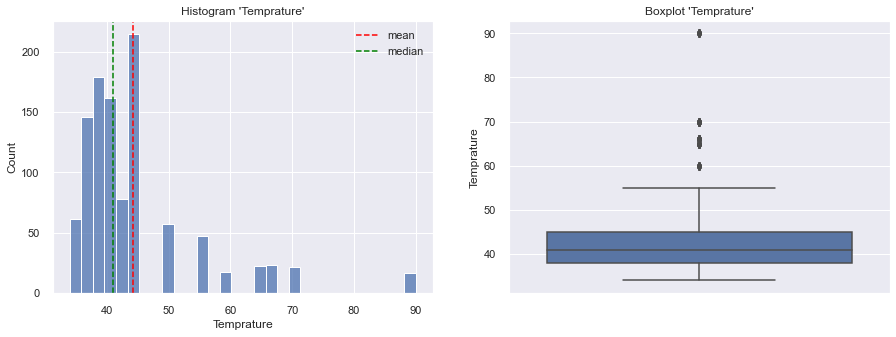

Temprature Kurtosis: 6.001508134923918
Temprature Skewness: 2.233126644916613
Columns 'Temprature' right skewed


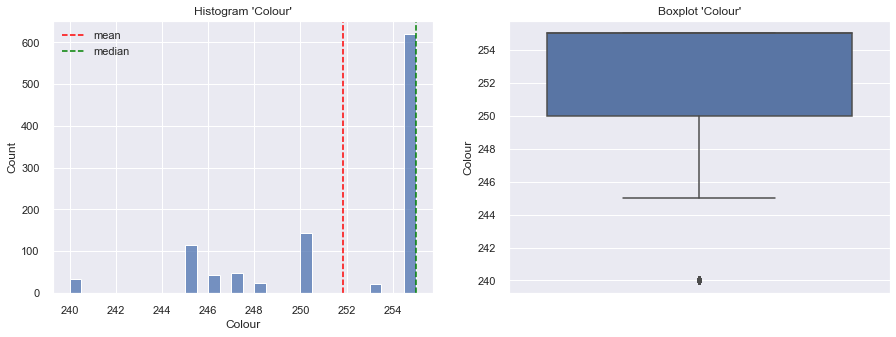

Colour Kurtosis: -0.1740925989111517
Colour Skewness: -1.0236688623735875
Columns 'Colour' left skewed


In [23]:
for col in df_num.columns:
    plot_dist(df_num,col)

Since pH and colour are not considered as outliers due to the fact that they can be set to a certain degree, the only thing that I will be handling is the temperature where the maximum temperature of milk is 73 degree celcius. 

In [24]:
df_num = df_num[df_num["Temprature"] < 73]
df_cat = df1[df1["Temprature"] < 73][["Taste", "Odor", "Fat ","Turbidity"]]
y = df1[df1["Temprature"] < 73][["Grade"]]

In [25]:
norm = 0
nonorm = 0
for col in df_num.columns:
  if df_num[col].skew() >=-0.5 and df_num[col].skew() <0.5:
    norm += 1
  else:
    nonorm +=1

if norm > nonorm:
  scaler = StandardScaler()
else:
  scaler = MinMaxScaler()
scaler

MinMaxScaler()

### Feature Scaling

In [26]:
scaler.fit(X_train_num)

X_train_num = scaler.transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

### Feature Encoding

Since the features are all encoded, I will be encoding our target which is Grade.

In [27]:
le = LabelEncoder()

le.fit_transform(y_train)
le.transform(y_test)

array([0, 0, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2,
       0, 0, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 1,
       0, 0, 1, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 1, 0,
       0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0,
       1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 2,
       1, 1, 0, 0, 1, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       2, 1, 1, 0, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0,
       0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 0,

### Merging Numerical Columns and Categorical Columns

In [28]:
X_train_final = np.concatenate([X_train_num, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num, X_test_cat], axis=1)
X_train_final

array([[0.38461538, 0.19642857, 0.66666667, ..., 0.        , 1.        ,
        1.        ],
       [0.55384615, 0.16071429, 0.66666667, ..., 0.        , 1.        ,
        1.        ],
       [0.23076923, 0.46428571, 0.66666667, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.92307692, 0.16071429, 0.66666667, ..., 0.        , 1.        ,
        1.        ],
       [0.53846154, 0.05357143, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.56923077, 0.07142857, 1.        , ..., 0.        , 1.        ,
        0.        ]])

# Model Definition

In [29]:
log_model = LogisticRegression()
svc_model = SVC()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()

## Model Training

In [30]:
for models in [log_model, svc_model, dt_model, rf_model, knn_model, nb_model]:
    models.fit(X_train_final, y_train)

## Checking Cross Validation

Since the data is balanced, I will be using the scoring of "accuracy" and splitting the cross validation into 3. 

In [31]:
cv_log_model = cross_val_score(log_model, X_train, y_train, cv=3, scoring="accuracy")
cv_svc_model = cross_val_score(svc_model, X_train, y_train, cv=3, scoring="accuracy")
cv_dt_model = cross_val_score(dt_model, X_train, y_train, cv=3, scoring="accuracy")
cv_rf_model = cross_val_score(rf_model, X_train, y_train, cv=3, scoring="accuracy")
cv_knn_model = cross_val_score(knn_model, X_train, y_train, cv=3, scoring="accuracy")
cv_nb_model = cross_val_score(nb_model, X_train, y_train, cv=3, scoring="accuracy")

In [32]:
cvh=0 # cross validation highest. At this point it's not determined and thus I use 0.
for cv,name in zip([cv_log_model,cv_svc_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_nb_model],
['log_model','svc_model','dt_model','rf_model','knn_model','nb_model','adaboost_model']):
    print(name)
    print('Accuracy - All - Cross Validation  : ', cv)
    print('Accuracy - Mean - Cross Validation : ', cv.mean())
    print('Accuracy - Std - Cross Validation  : ', cv.std())
    print('Accuracy - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cvh:
        cvh= cv.mean()
        nameh=name # nameh is the name of the model that has the highest cross validation score
    else:
        continue
print ('best model:', nameh)
print('cross-val mean:', cvh)

log_model
Accuracy - All - Cross Validation  :  [0.75409836 0.69958848 0.68312757]
Accuracy - Mean - Cross Validation :  0.712271470012818
Accuracy - Std - Cross Validation  :  0.030329929518269537
Accuracy - Range of Test-Set       :  0.6819415404945485 - 0.7426013995310875
--------------------------------------------------
svc_model
Accuracy - All - Cross Validation  :  [0.55327869 0.53497942 0.54320988]
Accuracy - Mean - Cross Validation :  0.5438226629787043
Accuracy - Std - Cross Validation  :  0.007483199055295594
Accuracy - Range of Test-Set       :  0.5363394639234087 - 0.5513058620339999
--------------------------------------------------
dt_model
Accuracy - All - Cross Validation  :  [0.99590164 0.99176955 0.99588477]
Accuracy - Mean - Cross Validation :  0.9945186534439722
Accuracy - Std - Cross Validation  :  0.0019439237729239724
Accuracy - Range of Test-Set       :  0.9925747296710482 - 0.9964625772168961
--------------------------------------------------
rf_model
Accuracy

From the cross validation score, we can see that random forest is the best model to predict our target followed by decision tree and KNN. Thus, we will be conducting hyperparameter tuning for random forest. 

### Hyperparameter Tuning for Random Forest

In [33]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [34]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_final, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [35]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

# Model Evaluation

## Model Evaluation of Random Forest with Default Hyperparameters

In [36]:
rf_y_pred_train = rf_model.predict(X_train_final)
rf_y_pred_test = rf_model.predict(X_test_final)

print ("Training")
print(classification_report(y_train, rf_y_pred_train))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,rf_y_pred_test))


Training
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       179
         low       1.00      1.00      1.00       288
      medium       1.00      1.00      1.00       263

    accuracy                           1.00       730
   macro avg       1.00      1.00      1.00       730
weighted avg       1.00      1.00      1.00       730



Test
              precision    recall  f1-score   support

        high       1.00      1.00      1.00        73
         low       1.00      1.00      1.00       133
      medium       1.00      1.00      1.00       108

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314



## Model Evaluation of Random Forest with Tuned Hyperparameters

In [37]:
rf_y_pred_train_best = rf_random.predict(X_train_final)
rf_y_pred_test_best = rf_random.predict(X_test_final)

print ("Training")
print(classification_report(y_train, rf_y_pred_train_best))
print("\n===========================\n")
print("Testing")
print(classification_report(y_test,rf_y_pred_test_best))


Training
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       179
         low       1.00      1.00      1.00       288
      medium       1.00      1.00      1.00       263

    accuracy                           1.00       730
   macro avg       1.00      1.00      1.00       730
weighted avg       1.00      1.00      1.00       730



Testing
              precision    recall  f1-score   support

        high       1.00      1.00      1.00        73
         low       1.00      1.00      1.00       133
      medium       1.00      1.00      1.00       108

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314



### Model Evaluation for Decision Tree

In [38]:
dt_y_pred_train = dt_model.predict(X_train_final)
dt_y_pred_test = dt_model.predict(X_test_final)

print ("Training")
print(classification_report(y_train, dt_y_pred_train))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,dt_y_pred_test))

Training
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       179
         low       1.00      1.00      1.00       288
      medium       1.00      1.00      1.00       263

    accuracy                           1.00       730
   macro avg       1.00      1.00      1.00       730
weighted avg       1.00      1.00      1.00       730



Test
              precision    recall  f1-score   support

        high       1.00      0.99      0.99        73
         low       1.00      1.00      1.00       133
      medium       0.99      1.00      1.00       108

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314



## Model Evaluation for KNN Model

In [39]:
knn_y_pred_train = knn_model.predict(X_train_final)
knn_y_pred_test = knn_model.predict(X_test_final)

print ("Training")
print(classification_report(y_train, knn_y_pred_train))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,knn_y_pred_test))

Training
              precision    recall  f1-score   support

        high       0.99      1.00      0.99       179
         low       0.99      0.99      0.99       288
      medium       1.00      0.99      1.00       263

    accuracy                           0.99       730
   macro avg       0.99      1.00      0.99       730
weighted avg       0.99      0.99      0.99       730



Test
              precision    recall  f1-score   support

        high       0.99      1.00      0.99        73
         low       1.00      0.99      1.00       133
      medium       1.00      1.00      1.00       108

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314



## Model Evaluation for Naive Bayer Model

In [40]:
nb_y_pred_train = nb_model.predict(X_train_final)
nb_y_pred_test = nb_model.predict(X_test_final)

print ("Training")
print(classification_report(y_train, nb_y_pred_train))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,nb_y_pred_test))

Training
              precision    recall  f1-score   support

        high       0.60      1.00      0.75       179
         low       0.97      0.92      0.94       288
      medium       0.96      0.58      0.73       263

    accuracy                           0.82       730
   macro avg       0.84      0.83      0.81       730
weighted avg       0.88      0.82      0.82       730



Test
              precision    recall  f1-score   support

        high       0.60      1.00      0.75        73
         low       0.93      0.93      0.93       133
      medium       0.95      0.53      0.68       108

    accuracy                           0.81       314
   macro avg       0.83      0.82      0.79       314
weighted avg       0.86      0.81      0.80       314



## Model Evaluation for Logistic Regression 

In [41]:
log_y_pred_train = log_model.predict(X_train_final)
log_y_pred_test = log_model.predict(X_test_final)

print ("Training")
print(classification_report(y_train, log_y_pred_train))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,log_y_pred_test))

Training
              precision    recall  f1-score   support

        high       0.67      0.77      0.72       179
         low       0.80      0.76      0.78       288
      medium       0.86      0.82      0.84       263

    accuracy                           0.78       730
   macro avg       0.78      0.78      0.78       730
weighted avg       0.79      0.78      0.79       730



Test
              precision    recall  f1-score   support

        high       0.71      0.75      0.73        73
         low       0.78      0.76      0.77       133
      medium       0.79      0.79      0.79       108

    accuracy                           0.77       314
   macro avg       0.76      0.77      0.76       314
weighted avg       0.77      0.77      0.77       314



## Model Evaluation for SVC Model

In [42]:
svc_y_pred_train = svc_model.predict(X_train_final)
svc_y_pred_test = svc_model.predict(X_test_final)

print ("Training")
print(classification_report(y_train, svc_y_pred_train))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,svc_y_pred_test))

Training
              precision    recall  f1-score   support

        high       0.83      0.95      0.89       179
         low       0.96      0.89      0.92       288
      medium       0.89      0.88      0.89       263

    accuracy                           0.90       730
   macro avg       0.89      0.91      0.90       730
weighted avg       0.90      0.90      0.90       730



Test
              precision    recall  f1-score   support

        high       0.83      0.99      0.90        73
         low       0.99      0.91      0.95       133
      medium       0.92      0.90      0.91       108

    accuracy                           0.92       314
   macro avg       0.91      0.93      0.92       314
weighted avg       0.93      0.92      0.92       314



From the evaluation score we can see that random forest with both default and tuned hyperparameters have the best outcome with the accuracy score of 1. I will be choosing the default parameters. 

# Pipeline

In [43]:
X_pipe = pd.concat([df_num.reset_index(drop=True), df_cat.reset_index(drop=True)], axis=1)
y_pipe = y.reset_index(drop=True)

xtr, xts, ytr, yts = train_test_split(X_pipe, y_pipe, train_size=0.7, stratify=y_pipe)

In [44]:
num_col = df_num.columns.values
cat_col = df_cat.columns.values

num_pipe = Pipeline([
    ('scaling',MinMaxScaler())
])

cat_pipe = Pipeline([
    ('encode',OrdinalEncoder())
])

preprocess = ColumnTransformer([
    ('num',num_pipe,num_col),
    ('cat',cat_pipe,cat_col)
])

pipe = Pipeline([('preprocessing', preprocess), ('classifier', RandomForestClassifier())],memory="cache_folder")

pipe.fit(xtr, ytr)

Pipeline(memory='cache_folder',
         steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  array(['pH', 'Temprature', 'Colour'], dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OrdinalEncoder())]),
                                                  array(['Taste', 'Odor', 'Fat ', 'Turbidity'], dtype=object))])),
                ('classifier', RandomForestClassifier())])

In [45]:
pickle.dump(pipe, open("deployment.pkl", "wb"))

# Data Inference

In [46]:
df_inf = df_inf[["pH","Temprature", "Taste","Odor","Fat ","Turbidity", "Colour"]]
df_inf

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,8.1,66,1,0,1,1,255
1,6.6,43,1,0,1,1,250
2,7.4,65,0,0,0,0,255
3,4.5,60,0,1,1,1,250
4,6.6,38,1,0,1,0,255
5,6.5,38,1,0,1,0,255
6,4.7,38,1,0,1,0,255
7,5.5,45,1,0,1,1,250
8,6.6,45,0,1,1,1,250
9,4.7,38,1,0,1,0,255


In [47]:
predict = pipe.predict(df_inf)
predict_df = pd.DataFrame(predict, columns = ["Prediction"])
pd.concat([df_inf, predict_df], axis=1)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Prediction
0,8.1,66,1,0,1,1,255,low
1,6.6,43,1,0,1,1,250,high
2,7.4,65,0,0,0,0,255,low
3,4.5,60,0,1,1,1,250,low
4,6.6,38,1,0,1,0,255,high
5,6.5,38,1,0,1,0,255,medium
6,4.7,38,1,0,1,0,255,low
7,5.5,45,1,0,1,1,250,low
8,6.6,45,0,1,1,1,250,high
9,4.7,38,1,0,1,0,255,low


# Conclusion

From the modelling I have conducted, the best algorithm is random forest with both default and tuned hyperparameter. The model can excellently predict the quality of milk with the consideration of pH, temperature, taste, odor, fat, turbidity and color.